# Exploratory Data Analysis - In progress

### Project Overview
This notebook explores patterns in NBA foul data across multiple seasons. The goal is to analyze how foul types, timing, and team roles vary with score margin and period. The project is in the EDA phase.

### Environment Setup
We begin by importing core Python libraries for data manipulation and visualisation.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

### Load Cleaned Data
We load pre-cleaned foul event data for the 2024–25 NBA season.

In [3]:
s24_25 = pd.read_csv("../data/clean_foul_events_2024-25.csv")

### Understanding the data
Key columns include:

- `PERIOD`: Quarter or overtime period (1–4 = regular, 5+ = OT)
- `SECONDSINQTR`: Seconds left in the quarter (720-0)
- `SCOREMARGIN`: Score difference at the time of the foul (positive = home lead)
- `HOMEDESCRIPTION` / `VISITORDESCRIPTION`: Foul text commentary. If the home team commited the foul, VISITORDESCRIPTION would be empty and vice versa
- `GAME_ID`: Unique identifier for the game
- `EVENTMSGTYPE`: Provides the play type (e.g. FIELD_GOAL_MADE, FIELD_GOAL_MISSED, TIMEOUT, PERIOD_BEGIN, etc.)
- `EVENTMSGACTIONTYPE`: Provides a subcatagorisation of EVENTMSGTYPE (e.g. REVERSE_LAYUP, 3PT_JUMP_SHOT, HOOK_SHOT, etc.)

This section explores the structure, completeness, and distribution of key variables to guide later analysis.

In [4]:
print("The shape of the dataset is", s24_25.shape)
print(s24_25.head())

The shape of the dataset is (85379, 8)
   EVENTNUM  EVENTMSGTYPE  PERIOD  PCTIMESTRING HOMEDESCRIPTION  \
0         9             6       1           690             NaN   
1        23             6       1           599             NaN   
2        39             6       1           520          p.foul   
3        65             6       1           428             NaN   
4        73             6       1           387          s.foul   

  VISITORDESCRIPTION  SCOREMARGIN   GAME_ID  
0             p.foul            0  42400405  
1             s.foul           -3  42400405  
2                NaN            1  42400405  
3                NaN            7  42400405  
4                NaN            8  42400405  


In [5]:
print(s24_25.columns)

Index(['EVENTNUM', 'EVENTMSGTYPE', 'PERIOD', 'PCTIMESTRING', 'HOMEDESCRIPTION',
       'VISITORDESCRIPTION', 'SCOREMARGIN', 'GAME_ID'],
      dtype='object')


In [6]:
print(s24_25.dtypes)

EVENTNUM               int64
EVENTMSGTYPE           int64
PERIOD                 int64
PCTIMESTRING           int64
HOMEDESCRIPTION       object
VISITORDESCRIPTION    object
SCOREMARGIN            int64
GAME_ID                int64
dtype: object


In [7]:
print(s24_25.isnull().sum())

EVENTNUM                  0
EVENTMSGTYPE              0
PERIOD                    0
PCTIMESTRING              0
HOMEDESCRIPTION       42948
VISITORDESCRIPTION    42919
SCOREMARGIN               0
GAME_ID                   0
dtype: int64


In [8]:
print("The different fouls logged by the home team in the 2024-24 NBA season are", sorted(s24_25['HOMEDESCRIPTION'].dropna().unique()))
print("The different fouls logged by the away team in the 2024-24 NBA season are", sorted(s24_25['VISITORDESCRIPTION'].dropna().unique()))

The different fouls logged by the home team in the 2024-24 NBA season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'foul', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'too many players tech foul', 'transition take foul']
The different fouls logged by the away team in the 2024-24 NBA season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'too many players tech foul', 'transition take foul']


In [11]:
print(f"The number of games in the 2024-25 NBA Fouls dataset is {len(pd.unique(s24_25["GAME_ID"]))}.")

The number of games in the 2024-25 NBA Fouls dataset is 2192.


### Foul Counts by Game Period
In this section, we analyse how fouls are distributed across different game periods (regulation and overtimes). This helps identify whether certain periods see higher foul activity.

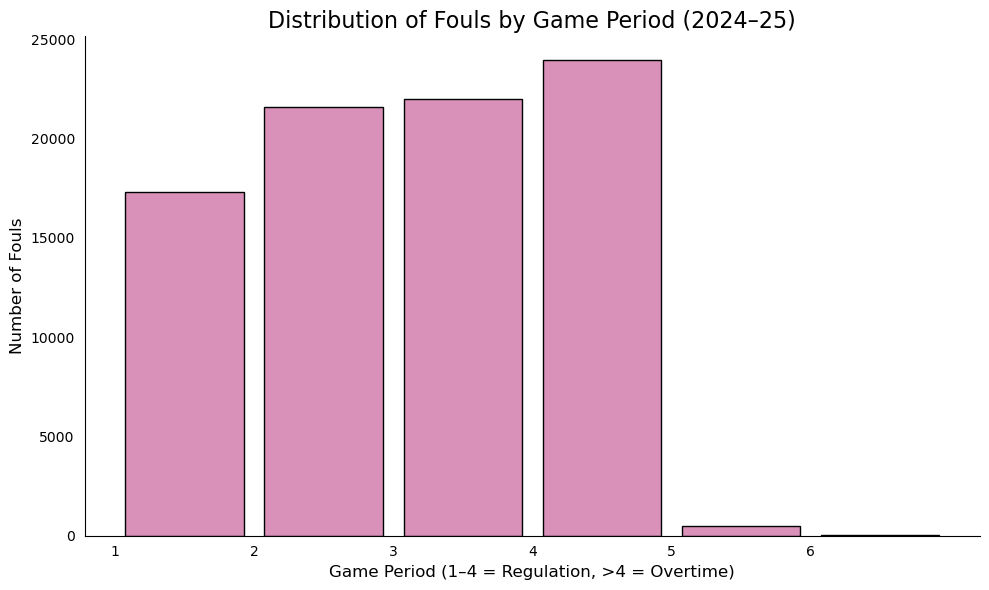

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    s24_25["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#d991ba",
    rwidth=0.85
)

ax.set_title("Distribution of Fouls by Game Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Regulation, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Number of Fouls", fontsize=12)
ax.set_xticks(range(1, s24_25["PERIOD"].max() + 1))
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

### Limitations of Raw Foul Count Comparisons Across Periods

The bar chart above shows the total number of fouls committed in each game period across the 2024–25 season. While this visualisation highlights that the 4th quarter sees the most fouls overall, and that the number of fouls continuously grows across quarters 1-4, it's important to interpret the overtime periods with caution.

**Why?**  
Fewer games go into overtime (5th period and beyond), so those periods naturally have fewer total fouls. Comparing raw foul counts between overtime and regulation periods doesn't account for how often those periods occur.

To make a fair comparison, we will normalise the foul counts by:
- The **number of games** that include each period, and/or
- The **total minutes played** in each period type.

This allows us to assess **foul rates per minute or per game**, rather than just total volume.


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    s24_25.dropna(subset=["VISITORDESCRIPTION"])["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#d991ba",
    rwidth=0.85,
    label="Visitor Team"
)

ax.hist(
    s24_25.dropna(subset=["HOMEDESCRIPTION"])["PERIOD"],
    bins=range(1, s24_25["PERIOD"].max() + 2),
    edgecolor='black',
    color="#80b1d3",
    rwidth=0.85,
    alpha = 0.5,
    label="Home Team"
)

ax.set_title("Distribution of Fouls Committed by Game Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Quarters, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Number of Fouls", fontsize=12)
ax.set_xticks(range(1, s24_25["PERIOD"].max() + 1))
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

In [ ]:
s24_25 = s24_25[s24_25["PCTIMESTRING"]<=720]
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

In [ ]:
sorted(s24_25["PCTIMESTRING"].dropna())[:10]

In [ ]:
print("The maximum score margin in the 2024-25 NBA season is", s24_25["SCOREMARGIN"].max())
print("The maximum score margin in the 2024-25 NBA season is", s24_25["SCOREMARGIN"].min())

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

Note that:

- **NBA time counts down**, so **0 = end of quarter** and **720 = start**.
- So the left bar (700–720) reflects **fewer fouls at the start** of quarters.
- **Rightmost bar (0–60)** reflects **end-of-quarter crunch time**, where fouling (especially intentional) is more frequent.


In [ ]:
s24_25['SECONDSINQTR'] = 720 - s24_25["PCTIMESTRING"]
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["SECONDSINQTR"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

#### Key Observations

#### 1. Foul frequency increases as the quarter progresses
- There's a clear **upward trend** in fouls.
- This suggests **players foul more as the quarter progresses**, likely due to:
  - **Tighter defense**
  - **Frustration fouls**
  - **Bonus situations**
  - **Intentional fouling strategies**

#### 2. Sharp spike in the final minute
- The last bin has the **highest number of fouls**.
- This is classic **“crunch time” fouling**: teams intentionally foul to stop the clock, force the fouled player to shoot free throws, and potentially gain possession of the ball.

#### 3. Relatively steady foul rate mid-quarter
- From minutes 2–10, the foul rate stays fairly **consistent**.
- Suggests a stable pace of play without major disruption or strategic shifts.

### Implications / Insights
- Coaches and analysts might:
  - Emphasise **discipline early in quarters** to avoid bonus penalties late.
  - Design **clock-aware defensive plays** for the final minute.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Second Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Second Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Third Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Third Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
quarters = [1, 2, 3, 4]
colors = ["#ebb9df", "#d991ba", "#8cae68", "#60992d"]

for i, period in enumerate(quarters):
    ax = axes[i // 2, i % 2]
    sns.histplot(
        s24_25[s24_25["PERIOD"] == period]["SECONDSINQTR"],
        bins=12, kde=True, color=colors[i], edgecolor="black", ax=ax
    )
    ax.set_title(f"Q{period}")
    ax.set_xlabel("Seconds Elapsed in Quarter")
    ax.set_ylabel("Number of Fouls")
    sns.despine(ax=ax)

plt.suptitle("Foul Timing Distribution by Quarter (2024–25)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
        s24_25[s24_25["PERIOD"] == 5]["SECONDSINQTR"],
        bins=12, kde=True, color="#d991ba", edgecolor="black"
    )
plt.title("Foul Timing Distribution in the Fifth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Number of Fouls")
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
        s24_25[s24_25["PERIOD"] == 6]["SECONDSINQTR"],
        bins=12, kde=True, color="#60992d", edgecolor="black"
    )
plt.title("Foul Timing Distribution in the Sixth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Number of Fouls")
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
q4_q5 = s24_25[s24_25["PERIOD"].isin([4, 5])].copy()

q4_last_min = q4_q5[(q4_q5["PERIOD"] == 4) & (q4_q5["SECONDSINQTR"] >= 660)]
q4_rest = q4_q5[(q4_q5["PERIOD"] == 4) & (q4_q5["SECONDSINQTR"] < 660)]

q5_last_min = q4_q5[(q4_q5["PERIOD"] == 5) & (q4_q5["SECONDSINQTR"] >= 660)]
q5_rest = q4_q5[(q4_q5["PERIOD"] == 5) & (q4_q5["SECONDSINQTR"] < 660)]

# number of games across the season across the league 
no_games = len(pd.unique(s24_25["GAME_ID"]))
# number of games that went into 5th quarter
no_firstover = len(pd.unique(s24_25[s24_25["PERIOD"]==5]["GAME_ID"]))
print(no_games, no_firstover)

In [ ]:
q4_last_min_fouls = len(q4_last_min)  # total fouls in final min of Q4 across all games
q4_rest_fouls = len(q4_rest)  # total fouls in rest of Q4

q5_last_min_fouls = len(q5_last_min)  # total fouls in final min of OT1
q5_rest_fouls = len(q5_rest)  # total fouls in rest of OT1

q4_last_min_total_minutes = no_games * 1
q4_rest_total_minutes = no_games * 11

q5_last_min_total_minutes = no_firstover * 1
q5_rest_total_minutes = no_firstover * 11

q1_fouls = len(s24_25[s24_25["PERIOD"]==1])
q2_fouls = len(s24_25[s24_25["PERIOD"]==2])
q3_fouls = len(s24_25[s24_25["PERIOD"]==3])
q4_fouls = len(s24_25[s24_25["PERIOD"]==4])
q5_fouls = len(s24_25[s24_25["PERIOD"]==5])

# fouls per minute per game
rates_per_min_per_game = {
    "Q1": q1_fouls/(no_games*12),
    "Q2": q2_fouls/(no_games*12),
    "Q3": q3_fouls/(no_games*12),
    "Q4": q4_fouls/(no_games*12),
    "Q5": q5_fouls/(no_firstover*12),
    "Q4 Last Min": q4_last_min_fouls / q4_last_min_total_minutes,
    "Q4 Rest": q4_rest_fouls / q4_rest_total_minutes,
    "Q5 Last Min": q5_last_min_fouls / q5_last_min_total_minutes,
    "Q5 Rest": q5_rest_fouls / q5_rest_total_minutes
}

# plot
plt.figure(figsize=(10, 6))
plt.bar(rates_per_min_per_game.keys(), rates_per_min_per_game.values(),
        color=["#ff006e", "#ff006e", "#ff006e", "#ff006e", "#ff006e", "#60992d", "#8cae68", "#d991ba", "#ebb9df"],
        edgecolor='black')
plt.title("Foul Rate per Minute per Game: Q4 and OT1")
plt.ylabel("Fouls per Minute per Game")
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
colors = ["#8338ec", "#ff006e", "#fb5607", "#ffbe0b"]

for i, period in enumerate(quarters):
    sns.kdeplot(
        data=s24_25[s24_25["PERIOD"] == period],
        x="SECONDSINQTR",
        label=f"Q{period}",
        bw_adjust=1,
        fill=False,
        color=colors[i],
        linewidth=2
    )

plt.title("KDE of Foul Timing by Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Estimated Density")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
s24_25["ABSMARGIN"] = s24_25["SCOREMARGIN"].abs()

plt.figure(figsize=(10, 6))

sns.histplot(s24_25["ABSMARGIN"], bins=30, color="#60992d")
plt.title("Distribution of Fouls by Score Margin")
plt.xlabel("Absolute Score Margin")
plt.ylabel("Number of Fouls")
sns.despine()
plt.show()

The histogram shows that **fewer fouls occur when the absolute score margin is large**, but it **also reflects the fact that large score margins are rarer**.

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25, x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")

sns.despine()
plt.show()


### Close Games (green line)

- Higher foul density **early** in the quarter
- Relatively steady through the middle
- **Peaks towards the end**.

### Non-Close Games (pink line)

- Slightly **lower foul density early**
- Peaks more **heavily toward the end** of the quarter
- Suggests **more late-quarter fouling** in games that aren’t close — possibly frustration fouls, garbage time, or bench players

### What This Could Mean

- In **close games**, teams may foul earlier to be aggressive or disrupt momentum, but play more carefully late to avoid giving away points.
- In **non-close games**, fouls may accumulate at the end when players are less restrained (e.g., intentional fouls, substitutions, fatigue).


In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==1], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the First Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==2], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Second Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==3], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Third Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==4], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Fourth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()


In [ ]:
# i want to plot timing of fouls across the entire game
